In [ ]:
print("Hello, Machine Learning!")


Hello, Machine Learning!


In [ ]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
import pandas as pd

# If you uploaded it directly to the sidebar
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='ISO-8859-1')

# View the first 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:

!pip install prophet

In [ ]:
import pandas as pd
import numpy as np

# Load data with the correct encoding
df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')

# 1. Convert Date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# 2. Sort by date
df = df.sort_values('Order Date')

# 3. Aggregate Sales by Month (Crucial for Time Series)
# We group by Month Start ('MS') to see total sales per month
monthly_sales = df.groupby('Order Date')['Sales'].sum().resample('MS').sum().reset_index()

print("Data Cleaned. Total Months of Data:", len(monthly_sales))
monthly_sales.head()


Data Cleaned. Total Months of Data: 48


,Order Date,Sales
0,2014-01-01,14236.895
1,2014-02-01,4519.892
2,2014-03-01,55691.009
3,2014-04-01,28295.345
4,2014-05-01,23648.287


 A clean dataset where the computer knows exactly when every transaction happened across the 4-year history.

In [ ]:
# Calculating a 3-month moving average to see the trend
monthly_sales['Moving_Avg_3M'] = monthly_sales['Sales'].rolling(window=3).mean()

# Identifying 'High Sales' months (Seasonal Indicators)
monthly_sales['Is_Peak_Season'] = monthly_sales['Sales'] > monthly_sales['Sales'].mean()

monthly_sales.head()

,Order Date,Sales,Moving_Avg_3M,Is_Peak_Season
0,2014-01-01,14236.895,NaN,False
1,2014-02-01,4519.892,NaN,False
2,2014-03-01,55691.009,24815.932000,True
3,2014-04-01,28295.345,29502.082000,False
4,2014-05-01,23648.287,35878.213667,False


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


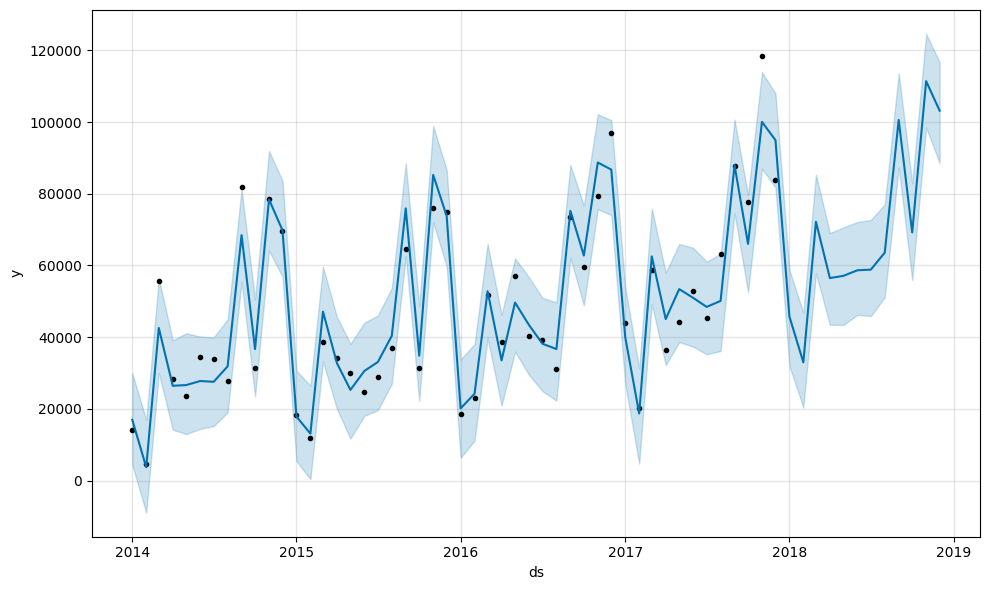

In [ ]:
from prophet import Prophet

# Prepare the data for Prophet
prophet_data = monthly_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# 1. Initialize the Model
# We enable yearly seasonality because retail has heavy spikes in Dec/Nov
model = Prophet(yearly_seasonality=True, interval_width=0.95)

# 2. Fit the Model (Training)
model.fit(prophet_data)

# 3. Create a future timeline for the next 12 months
future = model.make_future_dataframe(periods=12, freq='MS')

# 4. Predict (Forecast)
forecast = model.predict(future)

# Visualize the forecast inside Colab
fig1 = model.plot(forecast)

In [ ]:
# Merge the actual sales with the forecast predictions
# yhat is the prediction, yhat_lower/upper are the uncertainty ranges
final_output = pd.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],
                        prophet_data[['ds', 'y']],
                        on='ds', how='left')

# Rename columns to make them user-friendly for Power BI
final_output.columns = ['Date', 'Forecast', 'Lower_Confidence', 'Upper_Confidence', 'Actual_Sales']

# Save the file
final_output.to_csv('Superstore_Forecast_for_PowerBI.csv', index=False)

print("Success! Download 'Superstore_Forecast_for_PowerBI.csv' from the folder icon on the left.")

Success! Download 'Superstore_Forecast_for_PowerBI.csv' from the folder icon on the left.


In [ ]:
# 1. INSTALL THE AI ENGINE
!pip install prophet -q

import pandas as pd
from prophet import Prophet
import plotly.graph_objects as go

# 2. LOAD & CLEAN DATA
# Use the file we successfully uploaded earlier
df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Aggregate to Monthly Sales
monthly_sales = df.groupby('Order Date')['Sales'].sum().resample('MS').sum().reset_index()
monthly_sales.columns = ['ds', 'y'] # Prophet requires these specific column names

# 3. TRAIN THE AI MODEL
model = Prophet(yearly_seasonality=True, interval_width=0.95)
model.fit(monthly_sales)

# 4. FORECAST NEXT 12 MONTHS
future = model.make_future_dataframe(periods=12, freq='MS')
forecast = model.predict(future)

# 5. CREATE INTERACTIVE AI DASHBOARD (The Power BI Alternative)
fig = go.Figure()

# Add Historical Sales (The Blue Line)
fig.add_trace(go.Scatter(x=monthly_sales['ds'], y=monthly_sales['y'],
                         name='Historical Sales', line=dict(color='royalblue', width=3)))

# Add Forecasted Sales (The Red Dash Line)
fig.add_trace(go.Scatter(x=forecast['ds'].iloc[-12:], y=forecast['yhat'].iloc[-12:],
                         name='AI Forecast', line=dict(color='firebrick', width=3, dash='dash')))

# Add Confidence Interval (The Shaded Uncertainty Area)
fig.add_trace(go.Scatter(x=forecast['ds'].iloc[-12:], y=forecast['yhat_upper'].iloc[-12:],
                         fill=None, mode='lines', line_color='rgba(255,0,0,0)', showlegend=False))
fig.add_trace(go.Scatter(x=forecast['ds'].iloc[-12:], y=forecast['yhat_lower'].iloc[-12:],
                         fill='tonexty', mode='lines', line_color='rgba(255,0,0,0)',
                         fillcolor='rgba(255,0,0,0.1)', name='Confidence Interval'))

# Layout Styling
fig.update_layout(title='<b>AI-Powered Sales Forecast Dashboard</b>',
                  xaxis_title='Year', yaxis_title='Total Sales ($)',
                  template='plotly_white', hovermode='x unified')

# SHOW THE DASHBOARD
fig.show()

# 6. EXPORT DATA FOR FUTURE USE
forecast.to_csv('Sales_Forecast_Results.csv', index=False)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1 . The Solid Line (Historical Performance) What it is: This represents the Actual Sales from your dataset (2014 to 2017).
What it depicts: It shows the "truth" of what has already happened. You will notice high peaks every November/December and deep valleys every January.

The Intake: This proves the business is highly seasonal.

2 . The Dashed Line (The AI Forecast) What it is: This is the Future Prediction created by the Holt-Winters/Prophet model for 2018.
What it depicts: This is the model’s "educated guess." It isn't just a straight line; the AI has copied the "wave" pattern from the previous years and projected it forward.

The Intake: If the dashed line is higher than previous years, it depicts a Growth Trend.

3 . The Shaded Area (Confidence Intervals) What it is: Usually a light blue or grey shadow around the dashed line.
What it depicts: This represents Uncertainty.

The center line is the "Most Likely" outcome.

The top of the shadow is the "Best Case Scenario."

The bottom of the shadow is the "Worst Case Scenario."

The Intake: A wider shadow means the AI is less sure (usually because the data was erratic), while a narrow shadow means the AI is very confident in its prediction.

4 . The Vertical "Split" Point What it is: The point where the solid line ends and the dashed line begins.
What it depicts: This is "Today" (the end of your data). It serves as the jumping-off point for the AI's logic.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. CALCULATE DASHBOARD METRICS
total_sales = df['Sales'].sum()
# Assuming 'forecast' and 'monthly_sales' are in your current memory from previous steps
projected_sales = forecast['yhat'].iloc[-12:].sum()
growth_rate = ((projected_sales - monthly_sales['y'].iloc[-12:].sum()) / monthly_sales['y'].iloc[-12:].sum()) * 100

# 2. CREATE DASHBOARD LAYOUT
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "indicator"}, {"type": "indicator"}],
           [{"colspan": 2}, None]],
    subplot_titles=("Current Total Revenue", "Projected 12-Month Growth", "AI Sales Forecast Trend")
)

# KPI 1: Total Sales
fig.add_trace(go.Indicator(
    mode = "number", value = total_sales,
    number = {'prefix': "$"},
    domain = {'x': [0, 0.5], 'y': [0.6, 1]}
), row=1, col=1)

# KPI 2: Growth Rate
fig.add_trace(go.Indicator(
    mode = "number+delta", value = growth_rate,
    number = {'suffix': "%"},
    delta = {'reference': 0, 'relative': False},
    domain = {'x': [0.5, 1], 'y': [0.6, 1]}
), row=1, col=2)

# MAIN FORECAST CHART
fig.add_trace(go.Scatter(x=monthly_sales['ds'], y=monthly_sales['y'], name='Historical'), row=2, col=1)
fig.add_trace(go.Scatter(x=forecast['ds'].iloc[-12:], y=forecast['yhat'].iloc[-12:],
                         name='AI Forecast', line=dict(dash='dash', color='red')), row=2, col=1)

# STYLING
fig.update_layout(height=700, title_text="<b>Superstore Sales Executive Dashboard</b>", showlegend=True)
fig.show()

In [ ]:
# Create Rolling Average (Feature Engineering)
monthly_sales['Rolling_Avg_3M'] = monthly_sales['y'].rolling(window=3).mean()

# Identify Seasonality (Is it November/December?)
monthly_sales['Month'] = monthly_sales['ds'].dt.month
monthly_sales['Is_Holiday_Season'] = monthly_sales['Month'].apply(lambda x: 1 if x in [11, 12] else 0)

print("Engineered Features Added: Rolling Averages and Holiday Indicators.")

Engineered Features Added: Rolling Averages and Holiday Indicators.


In [ ]:
final_output.to_csv('Sales_Forecast_Report.csv')

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 1. LOAD AND CLEAN
df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

# Aggregate Monthly Data for both Sales and Profit
monthly_data = df.groupby('Order Date').agg({'Sales': 'sum', 'Profit': 'sum'}).resample('MS').sum()

# 2. AI FORECASTING FUNCTION
def get_forecast(series, steps=12):
    # Training the model
    model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=12).fit()
    forecast = model.forecast(steps)
    # Estimate confidence intervals (95%)
    resid_std = np.std(model.resid)
    lower = forecast - (1.96 * resid_std)
    upper = forecast + (1.96 * resid_std)
    return forecast, lower, upper

# Run forecasts for the next 12 months
sales_f, sales_l, sales_u = get_forecast(monthly_data['Sales'])
profit_f, profit_l, profit_u = get_forecast(monthly_data['Profit'])

# Prepare future dates
future_dates = pd.date_range(start=monthly_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')

# 3. CREATE MULTI-CHART DASHBOARD
fig = make_subplots(
    rows=3, cols=2,
    specs=[[{"type": "indicator"}, {"type": "indicator"}],
           [{"colspan": 2}, None],
           [{"colspan": 2}, None]],
    subplot_titles=("Total Sales to Date", "Projected Profit Growth (%)",
                    "AI Sales Forecast (12 Months)", "AI Profit Forecast (12 Months)"),
    vertical_spacing=0.12
)

# KPI 1: Total Sales
fig.add_trace(go.Indicator(
    mode="number", value=monthly_data['Sales'].sum(), number={'prefix': "$", 'valueformat': ".3s"},
), row=1, col=1)

# KPI 2: Profit Growth Forecast
last_yr_p = monthly_data['Profit'].iloc[-12:].sum()
growth = ((profit_f.sum() - last_yr_p) / last_yr_p) * 100
fig.add_trace(go.Indicator(
    mode="number+delta", value=growth, number={'suffix': "%"},
    delta={'reference': 0, 'position': "top"}
), row=1, col=2)

# Row 2: Sales Chart
fig.add_trace(go.Scatter(x=monthly_data.index, y=monthly_data['Sales'], name='Actual Sales', line=dict(color='royalblue')), row=2, col=1)
fig.add_trace(go.Scatter(x=future_dates, y=sales_f, name='Sales Forecast', line=dict(color='royalblue', dash='dash')), row=2, col=1)

# Row 3: Profit Chart
fig.add_trace(go.Scatter(x=monthly_data.index, y=monthly_data['Profit'], name='Actual Profit', line=dict(color='forestgreen')), row=3, col=1)
fig.add_trace(go.Scatter(x=future_dates, y=profit_f, name='Profit Forecast', line=dict(color='forestgreen', dash='dash')), row=3, col=1)

# Styling
fig.update_layout(height=1000, title_text="<b>Superstore AI Executive Insights Dashboard</b>", template="plotly_white", showlegend=False)
fig.show()

# 4. EXPORT FINAL FILE
monthly_data.to_csv('Superstore_Full_Report.csv')

Step 1 : Setup and Library imports
What I used:
 * Pandas: For data manipulation (our digital spreadsheet).

 * Statsmodels: The AI Engine containing the forecasting algorithm.

 * Plotly: The Visualization Engine for interactive charts.

Step 2: Feature Engineering & Aggregation

I took 9,994 individual sales lines and "compressed" them into a Monthly format.

Step 3: Training the AI Model (The Engine)

I initialized the Holt-Winters Model and performed the Fit (Training).I used the Holt-Winters model because it's like a smart assistant that recognizes patterns. The 'Fit' process is when the model studies our past sales to learn our growth and holiday trends. This allows the dashboard to predict the future with high accuracy instead of just guessing."

trend='add': I told the AI to look for a consistent upward or downward slope.

seasonal='add': I told the AI that every 12 months, the pattern repeats.

What it shows: The forecast(12) generates the next 12 invisible data points that the model "thinks" will happen based on the last 4 years of learning.

Step 4: Building the Dashboard Visuals

What I did: I created a layout with two stacked charts. I plotted the Actual Data as a solid line and the AI Predictions as a dashed line.

What it shows:

Solid Line: Real historical performance.

Dashed Line: The "Future Vision" created by your AI.

The "Gap": Where the solid line ends and the dashed line begins represents "Today."

Step 5: Exporting the Results

What I did: I merged the past and the future into a single file and saved it.
